### Industrial Distributors, Inc.

#### Como director de compras de Industrial Distributors, Walter Negley debía planear las cantidades de compra para los productos de más alto valor que Industrial Distributors compraba y revendía a sus clientes industriales bajo un ciclo de pedido corto. Uno de estos productos era un motor de remplazo utilizado en transportadores. Las ventas de reemplazo se recibían de clientes localizados en América del Norte y eran aproximadamente constantes durante el año. Los motores se fabricaban en Alemania occidental y se importaban a través del puerto de Baltimore. Se transportaban por camión a un almacén privado en Chicago. Aunque el fabricante en Alemania tenía una política de precios que incluían transportación a Baltimore, Industrial incurría en los gastos de transporte desde Baltimore hasta Chicago. Para ayudarle a determinar las cantidades de adquisición, Walter reunió la siguiente información:
  
| Descripción de la información                         | Cantidades/Costos         | Fuente de información |
|-------------------------------------------------------|---------------------------|-----------------------|
| Ventas anuales promedio                               | 1,500 unidades            | Ventas                |
| Tiempo de entrega de reabastecimiento                 | 1 mes (0.083 año)         | Compras               |
| Costo administrativo por requisición                  | \\$20.00                  | Contabilidad          |
| Costo auxiliar por requisición                        | \\$5.00                   | Tráfico               |
| Costo de manejo de inventario                         | 30% por año               | Finanzas              |
| Peso empacado por unidad                              | 250 lb                    | Tráfico               |
| Costo de descarga en el almacén                       | \\$0.25 por cwt           | Contabilidad          |
| Capacidad de almacenamianto en el almacén<sup>a</sup> | 300 unidades              | Gerente de almacén    |
| Tarifas de almacenaje en almacén público              | \\$200 por unidad por año | Almacén público       |

<sup>a</sup>Sólo existe suficiente espacio en el almacén de la compañía para almacenar 300 unidades. Si se recibe un tamaño de un pedido de reabastecimiento mayor a 300 unidades, el excedente deberá almacenarse en un almacén público.

#### El fabricante acaba de anunciar su nuevo programa de precios para los motores puestos en el puerto de Baltimore.

| Unidades por pedido | Precio unitario  |
|---------------------|:----------------:|
| Primeros 100        | \\$700           |
| Siguientes 100      | \\$680           |
| Por encima de 200   | \\$670           |

#### Al verificar con su compañía de transporte por camión, para desplazar los motores desde Baltimore, Walter observó que era práctico contratar envíos de carga de camión completo a \\$12/cwt. (cwt = 100 lbs) para cantidades de carga completa (TL) de 40,000 lbs o más, o para cantidades menores a carga completa (LTL) a \\$18/cwt.
 
#### &nbsp; 1. ¿Qué tamaño de pedido de reabastecimiento, aproximado a las siguientes 50 unidades, deberá Walter solicitar, dada la política de precios no incluyente del fabricante?
#### &nbsp; 2. ¿Debería Walter cambiar su tamaño de pedido de reabastecimiento si la política de precios del fabricante fuera una donde el precio en cada intervalo de precio según cantidad incluyera a todas las unidades adquiridas?

---
### **Respuesta 1**

#### Para poder determinar el tamaño de pedido es necesario contemplar la totalidad de los costos:
- Compra (CC)
- Ordenar (CO)
- Transporte (CT)
- Descarga (CD)
- Mantenimiento de inventario  (CI)
- Almacén público (CA)

$Costo\ Total = (CC + CO + CT + CD + CI + CA)\cdot N$  

$CC=C\cdot Q$  
$CO=S$  
$CI=CAMI$ 

---
$A = 1500$ unidades  

$H = C\cdot i$  

$CAMI = \frac{Q}{2}\cdot H$

$S = 20 + 5 = 25$ pesos  

$N = \frac{A}{Q}$

$Q = ?; Q \in \mathbb{N}; Q \equiv 0 \mod{50}$

$i = 30\%$

$C =?$

Donde:  
$A$ es uso anual  
$H$ es el costo de mantener el inventario por unidad al año  
$CAMI$ es el costo anual de mantenimiento de inventario  
$S$ es el costo por ordenar  
$N$ es la cantidad de órdenes de reposición al año  
$Q$ es el tamaño del lote  
$i$ es costo de manejo de inventario  
$C$ es el costo unitario  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from tabulate import tabulate

def precio1(lote):
    if lote <= 100:
        return lote * 700
    elif 100 < lote <= 200:
        return precio1(100) + (lote - 100) * 680
    else:
        return precio1(200) + (lote - 200) * 670


def precio2(lote):
    if lote <= 100:
        return lote * 700
    elif 100 < lote <= 200:
        return lote * 680
    else:
        return lote * 670


def peso(lote):
    return lote * 250


def transporte(peso):
    if peso >= 40_000:
        return peso / 100 * 12
    else:
        return peso / 100 * 18


def descarga(peso):
    return peso / 100 * 0.25


def almacen(lote):
    if lote > 300:
        return (lote - 300) * 200 / 2
    else:
        return 0


A = 1500
S = 25
i = 0.3

In [9]:
resultados1 = []
for q in range(50, 500, 50):
    escenario = []
    escenario.append(q)  # Q
    escenario.append(A / q)  # N
    escenario.append(precio1(q) / q)  # C
    escenario.append(precio1(q) * escenario[1])  # CC
    escenario.append(escenario[1] * S)  # CO
    escenario.append(escenario[1] * transporte(peso(q)))  # CT
    escenario.append(escenario[1] * descarga(peso(q)))  # CD
    escenario.append(q / 2 * escenario[2] * i)  # CI
    escenario.append(escenario[1] * almacen(q))  # CA
    escenario.append(sum(escenario[3:])) #TOTAL
    resultados1.append(escenario)

headers = ["Q", "N", "C", "CC", "CO", "CT", "CD", "CI", "CA", "TOTAL"]
print(tabulate(resultados1, headers, tablefmt="github", floatfmt=",.2f"))

|   Q |     N |      C |           CC |     CO |        CT |     CD |        CI |           CA |        TOTAL |
|-----|-------|--------|--------------|--------|-----------|--------|-----------|--------------|--------------|
|  50 | 30.00 | 700.00 | 1,050,000.00 | 750.00 | 67,500.00 | 937.50 |  5,250.00 |         0.00 | 1,124,437.50 |
| 100 | 15.00 | 700.00 | 1,050,000.00 | 375.00 | 67,500.00 | 937.50 | 10,500.00 |         0.00 | 1,129,312.50 |
| 150 | 10.00 | 693.33 | 1,040,000.00 | 250.00 | 67,500.00 | 937.50 | 15,600.00 |         0.00 | 1,124,287.50 |
| 200 |  7.50 | 690.00 | 1,035,000.00 | 187.50 | 45,000.00 | 937.50 | 20,700.00 |         0.00 | 1,101,825.00 |
| 250 |  6.00 | 686.00 | 1,029,000.00 | 150.00 | 45,000.00 | 937.50 | 25,725.00 |         0.00 | 1,100,812.50 |
| 300 |  5.00 | 683.33 | 1,025,000.00 | 125.00 | 45,000.00 | 937.50 | 30,750.00 |         0.00 | 1,101,812.50 |
| 350 |  4.29 | 681.43 | 1,022,142.86 | 107.14 | 45,000.00 | 937.50 | 35,775.00 | 21,428.57    | 1,125,3

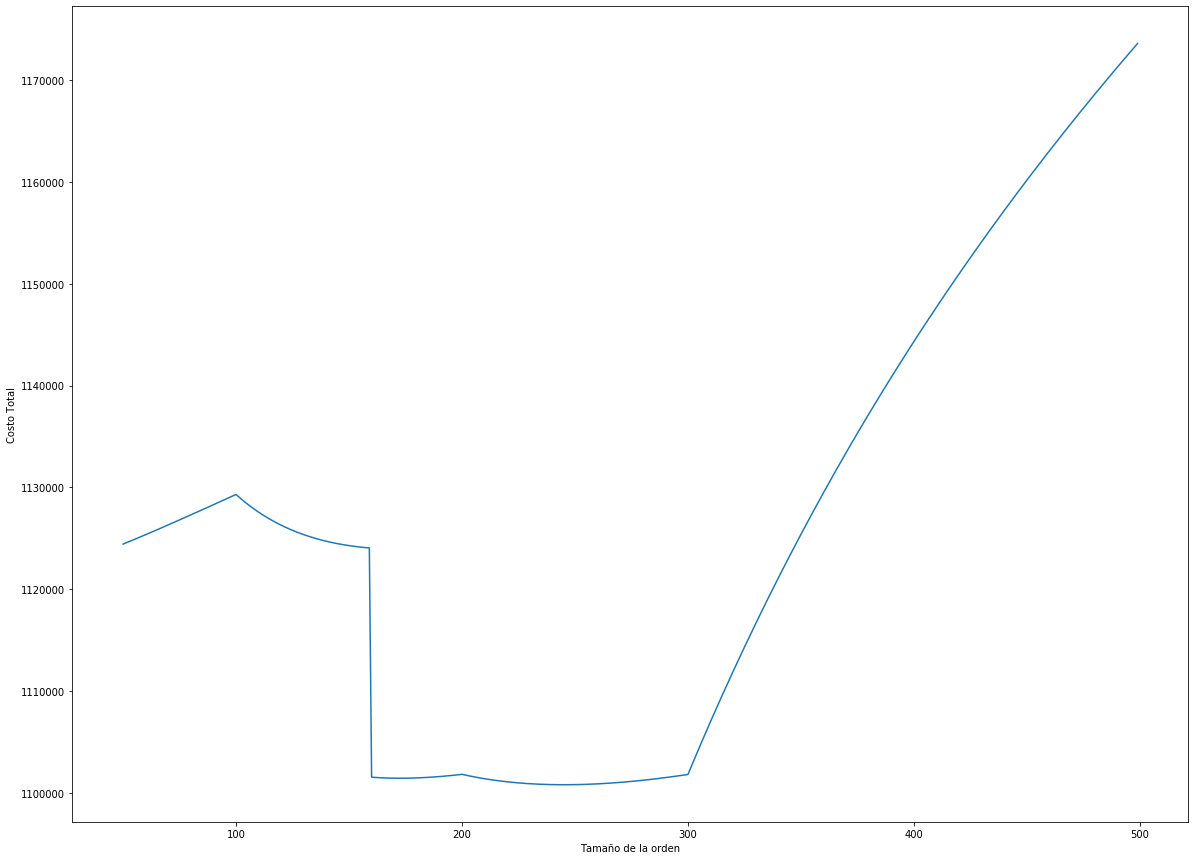

Mínimo:
Q: 245 	Total: 1,100,802.86


In [3]:
plot1x = []
plot1y = []
for q in range(50, 500, 1):
    escenario = []
    escenario.append(q)  # Q
    escenario.append(A / q)  # N
    escenario.append(precio1(q) / q)  # C
    escenario.append(precio1(q) * escenario[1])  # CC
    escenario.append(escenario[1] * S)  # CO
    escenario.append(escenario[1] * transporte(peso(q)))  # CT
    escenario.append(escenario[1] * descarga(peso(q)))  # CD
    escenario.append(q / 2 * escenario[2] * i)  # CI
    escenario.append(escenario[1] * almacen(q))  # CA
    escenario.append(sum(escenario[3:])) #TOTAL
    plot1x.append(q)
    plot1y.append(escenario[-1])
    
plt.rcParams['figure.figsize'] = [20,15]
plt.plot(plot1x,plot1y)
plt.ylabel('Costo Total')
plt.xlabel('Tamaño de la orden')
plt.show()

idx1 = plot1y.index(min(plot1y))
print('Mínimo:\nQ: {} \tTotal: {:,.2f}'.format(plot1x[idx1],plot1y[idx1]))

---
### **Respuesta 2**

#### Se puede usar como base el mismo modelo que se usó previamente, solo es necesario cambiar la manera en que se calcula el costo de los motores.

In [4]:
resultados2 = []
for q in range(50, 500, 50):
    escenario = []
    escenario.append(q)  # Q
    escenario.append(A / q)  # N
    escenario.append(precio2(q) / q)  # C
    escenario.append(precio2(q) * escenario[1])  # CC
    escenario.append(escenario[1] * S)  # CO
    escenario.append(escenario[1] * transporte(peso(q)))  # CT
    escenario.append(escenario[1] * descarga(peso(q)))  # CD
    escenario.append(q / 2 * escenario[2] * i)  # CI
    escenario.append(escenario[1] * almacen(q))  # CA
    escenario.append(sum(escenario[3:])) #TOTAL
    resultados2.append(escenario)

print(tabulate(resultados2, headers, tablefmt="github", floatfmt=",.2f"))

|   Q |     N |      C |           CC |     CO |        CT |     CD |        CI |           CA |        TOTAL |
|-----|-------|--------|--------------|--------|-----------|--------|-----------|--------------|--------------|
|  50 | 30.00 | 700.00 | 1,050,000.00 | 750.00 | 67,500.00 | 937.50 |  5,250.00 |         0.00 | 1,124,437.50 |
| 100 | 15.00 | 700.00 | 1,050,000.00 | 375.00 | 67,500.00 | 937.50 | 10,500.00 |         0.00 | 1,129,312.50 |
| 150 | 10.00 | 680.00 | 1,020,000.00 | 250.00 | 67,500.00 | 937.50 | 15,300.00 |         0.00 | 1,103,987.50 |
| 200 |  7.50 | 680.00 | 1,020,000.00 | 187.50 | 45,000.00 | 937.50 | 20,400.00 |         0.00 | 1,086,525.00 |
| 250 |  6.00 | 670.00 | 1,005,000.00 | 150.00 | 45,000.00 | 937.50 | 25,125.00 |         0.00 | 1,076,212.50 |
| 300 |  5.00 | 670.00 | 1,005,000.00 | 125.00 | 45,000.00 | 937.50 | 30,150.00 |         0.00 | 1,081,212.50 |
| 350 |  4.29 | 670.00 | 1,005,000.00 | 107.14 | 45,000.00 | 937.50 | 35,175.00 | 21,428.57    | 1,107,6

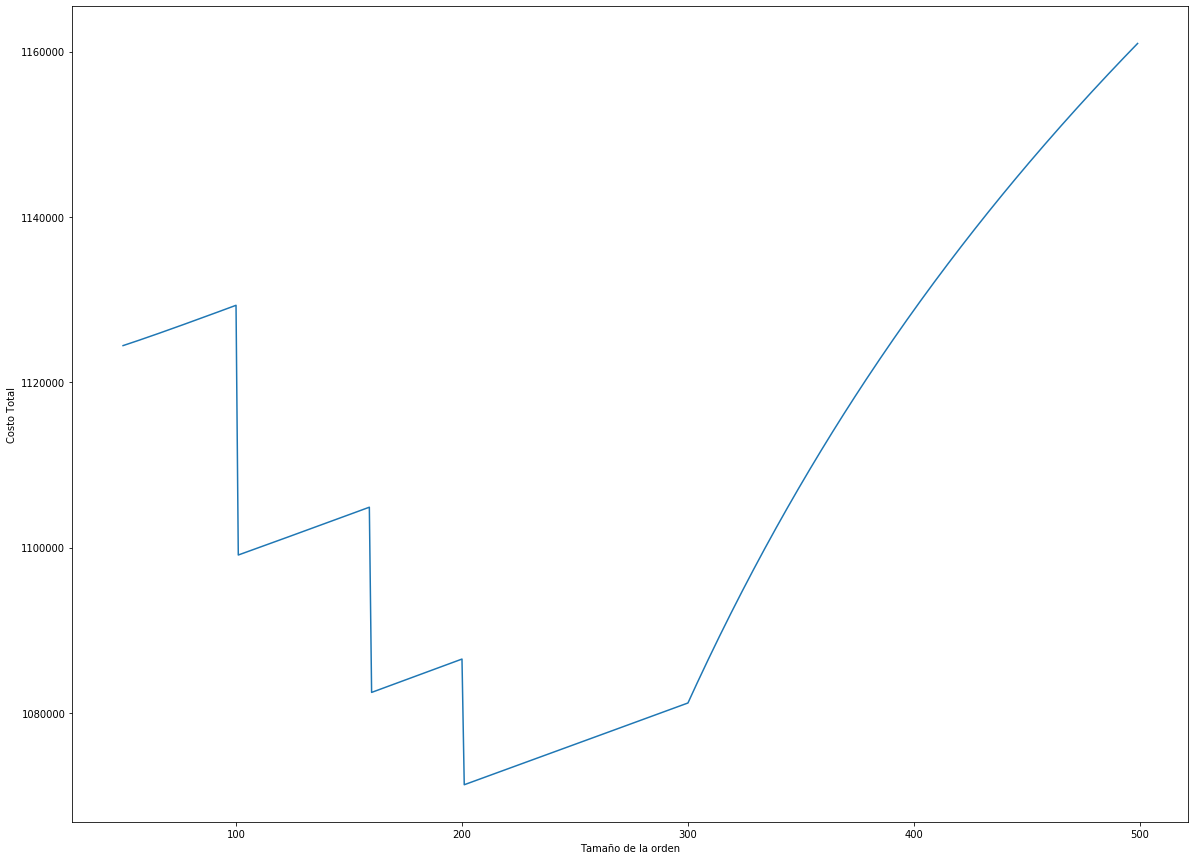

Mínimo:
Q: 201 	Total: 1,071,324.57


In [7]:
plot2x = []
plot2y = []
for q in range(50, 500, 1):
    escenario = []
    escenario.append(q)  # Q
    escenario.append(A / q)  # N
    escenario.append(precio2(q) / q)  # C
    escenario.append(precio2(q) * escenario[1])  # CC
    escenario.append(escenario[1] * S)  # CO
    escenario.append(escenario[1] * transporte(peso(q)))  # CT
    escenario.append(escenario[1] * descarga(peso(q)))  # CD
    escenario.append(q / 2 * escenario[2] * i)  # CI
    escenario.append(escenario[1] * almacen(q))  # CA
    escenario.append(sum(escenario[3:])) #TOTAL
    plot2x.append(q)
    plot2y.append(escenario[-1])

plt.rcParams['figure.figsize'] = [20,15]
plt.plot(plot2x,plot2y)
plt.ylabel('Costo Total')
plt.xlabel('Tamaño de la orden')
plt.show()

idx2 = plot2y.index(min(plot2y))
print('Mínimo:\nQ: {} \tTotal: {:,.2f}'.format(plot2x[idx2],plot2y[idx2]))